In [1]:
import pickle
import pandas as pd
import numpy as np

In [129]:
with open('df.pickle', 'rb') as to_read:
    df = pickle.load(to_read)

In [130]:
df.head()

,_id,episodeID,full_trans,PJ,Alex
0,5d55ed03a18334a684f84834,/shows/reply-all/xjhx3l/146-summer-hotline,PJ VOGT: Hey Alex.ALEX GOLDMAN: Hey PJ.PJ: You...,Hey Alex. You remember the other day we tol...,"Hey PJ. I do remember that. Alright. Uh,..."
1,5d55ed03a18334a684f84835,/shows/reply-all/rnhzlo/145-louder,ALEX GOLDMAN: From Gimlet this is Reply All. I...,,From Gimlet this is Reply All. I’m Alex Gold...
2,5d55ed03a18334a684f84836,/shows/reply-all/6nhgol/144-dark-pattern,PJ VOGT: From Gimlet this is Reply All. I’m PJ...,From Gimlet this is Reply All. I’m PJ Vogt. ...,
3,5d55ed03a18334a684f84837,/shows/reply-all/76hdrj/143-permanent-record,"[THEME MUSIC]PJ VOGT: From Gimlet, this is Rep...","From Gimlet, this is Reply All. I’m PJ Vogt....",And I’m Alex Goldman. Hi Phia. Oh. (chuck...
4,5d55ed03a18334a684f84838,/shows/reply-all/gmhr36/142-we-didnt-start-the...,"[THEME MUSIC]PJ: From Gimlet, this is Reply Al...","From Gimlet, this is Reply All. I’m PJ Vogt....",And I’m Alex Goldman. Welcome once again to...


## Text Preprocessing

In [131]:
import re
import string

In [132]:
#Remove speaker names:

rem_names = lambda x: re.sub('[A-Z ]+:', ' ', x)
df['full_trans'] = df.full_trans.map(rem_names)

In [133]:
#remove [THEME MUSIC], (laughs) etc

remove_brackets = lambda x: re.sub('\[[A-z ]+\]', ' ', x)
remove_paren = lambda x: re.sub('\([A-z, ]+\)', ' ', x)

df['full_trans'] = df.full_trans.map(remove_brackets).map(remove_paren)
df['PJ'] = df.PJ.map(remove_brackets).map(remove_paren)
df['Alex'] = df.Alex.map(remove_brackets).map(remove_paren)

In [134]:
#remove punctuation, make lowercase

punc = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

df['full_trans'] = df.full_trans.map(punc).map(alphanumeric)
df['PJ'] = df.PJ.map(punc).map(alphanumeric)
df['Alex'] = df.Alex.map(punc).map(alphanumeric)

In [135]:
#remove additional apostrophes

apos = lambda x: re.sub(r"[\"\',”’–“‘—]", ' ', x)

df['full_trans'] = df.full_trans.map(apos)
df['PJ'] = df.PJ.map(apos)
df['Alex'] = df.Alex.map(apos)

In [136]:
#space removal

string = lambda x: x.replace(u'\xa0', u' ')

df['full_trans'] = df.full_trans.map(string)
df['PJ'] = df.PJ.map(string)
df['Alex'] = df.Alex.map(string)

In [137]:
df.head()

,_id,episodeID,full_trans,PJ,Alex
0,5d55ed03a18334a684f84834,/shows/reply-all/xjhx3l/146-summer-hotline,hey alex hey pj you remember the other d...,hey alex you remember the other day we tol...,hey pj i do remember that alright uh ...
1,5d55ed03a18334a684f84835,/shows/reply-all/rnhzlo/145-louder,from gimlet this is reply all i m alex gold...,,from gimlet this is reply all i m alex gold...
2,5d55ed03a18334a684f84836,/shows/reply-all/6nhgol/144-dark-pattern,from gimlet this is reply all i m pj vogt ...,from gimlet this is reply all i m pj vogt ...,
3,5d55ed03a18334a684f84837,/shows/reply-all/76hdrj/143-permanent-record,from gimlet this is reply all i m pj vogt...,from gimlet this is reply all i m pj vogt ...,and i m alex goldman hi phia oh ...
4,5d55ed03a18334a684f84838,/shows/reply-all/gmhr36/142-we-didnt-start-the...,from gimlet this is reply all i m pj vogt...,from gimlet this is reply all i m pj vogt ...,and i m alex goldman welcome once again to...


In [138]:
#remove staff names/ company words that appear the most in episodes/credits

staff = ['alex', 'goldman', 'anna foley', 'damiano', 'marchetti', 'emmanual dzotsi', 
         'jessica yung', 'phia', 'bennin', 'pj', 'vogt', 'rick kwan', 'michelle harris', 
         'sruthi', 'pinnamaneni', 'tim howard', 'blumberg', 'matt lieber', 'gimlet' , 
         'reply all', 'build buildings', 'spotify']

for word in staff:
    df['full_trans'] = df['full_trans'].str.replace(word, ' ')
    df['PJ'] = df['PJ'].str.replace(word, ' ')
    df['Alex'] = df['Alex'].str.replace(word, ' ')

In [139]:
df.head()

,_id,episodeID,full_trans,PJ,Alex
0,5d55ed03a18334a684f84834,/shows/reply-all/xjhx3l/146-summer-hotline,hey hey you remember the other day w...,hey you remember the other day we told p...,hey i do remember that alright uh ...
1,5d55ed03a18334a684f84835,/shows/reply-all/rnhzlo/145-louder,from this is i m carlos maza gre...,,from this is i m carlos maza gre...
2,5d55ed03a18334a684f84836,/shows/reply-all/6nhgol/144-dark-pattern,from this is i m so my absolute fa...,from this is i m so my absolute fa...,
3,5d55ed03a18334a684f84837,/shows/reply-all/76hdrj/143-permanent-record,from this is i m and i m ...,from this is i m and is here...,and i m hi oh mhm right ...
4,5d55ed03a18334a684f84838,/shows/reply-all/gmhr36/142-we-didnt-start-the...,from this is i m and i m ...,from this is i m question mark ...,and i m welcome once again to yes ye...


# What is ReplyAll about?

## NLP

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [189]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Vectorization

In [245]:
from sklearn.feature_extraction import text

In [16]:
more_stop_words = ['like', 'just', 'yeah', 'people', 'know', 'said', 
                   'uh', 'really', 'don', 'going', 'think', 'did',
                  'got', 'right', 'thing', 'want', 'actually', 'um',
                  'ok', 'oh', 'hello', 'good', 'yes', 'think', 'sort',
                  've', 'kind', 'say', 'way', 'things', 'okay', 'didn',
                  'hi', 'gonna', 'alright', 'feel', 'll', 'say', 'bye',
                  'guys', 'stuff', 'guy']
                   
                   
                   #,'lot','make', 'hey','getting',
                  #'happened', 'doesn', 'place', 'week', 'need', 'basically', 
                 #  'talking', 'told','let', 'wanted', 'says', 'look']

stop_words = text.ENGLISH_STOP_WORDS.union(more_stop_words)

In [17]:
X_full = df['full_trans']

### Count Vectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
CV_full = CountVectorizer(stop_words = stop_words, ngram_range = (1,2))
doc_word_full_cv = CV_full.fit_transform(X_full)

df_X_full_cv = pd.DataFrame(doc_word_full_cv.toarray(), columns=CV_full.get_feature_names())

In [21]:
df_X_full_cv.shape

(144, 205802)

### TF - IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
TF_full = TfidfVectorizer(stop_words= stop_words, ngram_range=(1,2))
TF_full.fit_transform(X_full)

doc_word_full_tf = TF_full.transform(X_full)

df_X_full_tf = pd.DataFrame(doc_word_full_tf.toarray(), columns=TF_full.get_feature_names())

In [25]:
df_X_full_tf.shape

(144, 205802)

## Topic Modeling

### NMF

In [26]:
from sklearn.decomposition import NMF

In [27]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i] 
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

### With Count Vectorizer

In [261]:
nmf_model_cv = NMF(4)
df_f = nmf_model_cv.fit_transform(df_X_full_cv)

In [262]:
nmf_model_cv.components_.shape

(4, 205802)

In [264]:
display_topics(nmf_model_cv, CV_full.get_feature_names(), 45)


Topic  0
time, lot, mean, new, little, day, called, make, doing, tell, phone, person, says, internet, hey, look, trying, year, talk, went, work, story, wanted, started, let, life, come, maybe, thought, man, god, world, years, does, week, pretty, need, talking, place, basically, doesn, told, big, felt, bad, point, happened, website, great, remember, getting, hear, episode, house, idea, thanks, weird, home, love, sure, different, somebody, probably, money, company, thank, real, number, try, looking, old, long, question, wait, help, came, everybody, away, night, music, couple, saying, wasn, end, problem, huh, nice, having, calls, job, woman, crazy, exactly, use, used, feels, start, york, bunch, times, new york, calling, bit, able, looks, friends, asked, hard, video, talked, friend, sorry, making, song, ago, play, saw, better, heard, crime, game, kids, matt, totally, paul, sounds, online, room, reason, facebook, picture, guess, gets, hours, ask, car, care, couldn, live, school, door, chec

Topic 1: Super Tech Support
Topic 2: PJ stories (foxconn, turbotax)
Topic 3: Sports, Sports, Sports
Topic 4: Adam Pisces
Topic 5: Brinkley

### With TF-IDF

In [33]:
t_nmf_model = NMF(8)
t_df_f = t_nmf_model.fit_transform(df_X_full_tf)

In [34]:
display_topics(t_nmf_model, TF_full.get_feature_names(), 50)


Topic  0
time, phone, lot, mean, called, make, little, internet, doing, person, day, tell, look, says, new, work, company, hey, paul, year, wanted, trying, number, story, basically, episode, started, talk, let, went, money, god, maybe, calls, does, kamal, life, told, pretty, bad, weird, felt, website, mhm, talking, facebook, week, man, come, thought

Topic  1
uber, account, password, hacked, email, data, accounts, gmail, phone, bahamas, uber account, emails, number, joseph, pizza, pwned, melanie, richard, uber accounts, hackers, email address, breach, windows, troy, address, dark web, happened, account hacked, mhm, surface pro, daniel, theory, notifications, surface, pan, blah, gmail account, pan pizza, breaches, tablet, sent, told, hack, bounty, username, username password, dad, credit card, phone number, rides

Topic  2
crudo, correa, ecuador, president, gabriel, crudo ecuador, daniel, photo, twitter, appointment, ambulante, radio ambulante, flowers, letter, mayor, shopping, mall, r

Topic 4: Yes, Yes, No/Sports, Sports, Sports
Topc 5: Email Debt Forgiveness Day

### LSA

In [35]:
from sklearn.decomposition import TruncatedSVD

### With Count Vectorizer

In [39]:
lsa = TruncatedSVD(6)  
lsa.fit_transform(df_X_full_cv)

lsa.explained_variance_ratio_ #22% variance explained

array([0.05361987, 0.03174732, 0.02636144, 0.02478039, 0.02387157,
       0.02255372])

In [40]:
display_topics(lsa, CV_full.get_feature_names(), 45)


Topic  0
time, mean, lot, phone, make, person, called, says, internet, new, doing, little, look, day, tell, let, hey, does, work, story, basically, started, god, went, talk, trying, told, come, happened, world, number, tweet, point, wanted, year, man, talking, weird, thought, big, pretty, maybe, saying, years, somebody

Topic  1
uber, account, phone, email, number, password, accounts, data, hacked, emails, phone number, address, sent, information, told, lizzie, gmail, hackers, email address, joseph, computer, domino, hacker, send, happened, mhm, super, card, credit, google, hey, use, weird, access, company, bounty, snapchat, getting, hack, maxime, credit card, uber account, security, pizza, theory

Topic  2
village, foxconn, pleasant, mount pleasant, dave, mount, kelly, brinkley, degroot, company, money, deal, told, dollars, meeting, factory, house, free, domino, phone, make, music, work, order, town, board, dave degroot, number, wisconsin, jobs, hall, milk, america, file, home, villa

Topic 1: Super Tech Support
Topic 2:

### With TF-IDF

In [42]:
lsa_tf = TruncatedSVD(6)  
doc_topic = lsa_tf.fit_transform(df_X_full_tf)

In [43]:
display_topics(lsa_tf, TF_full.get_feature_names(), 45)


Topic  0
time, phone, mean, lot, internet, tweet, email, uber, day, person, make, called, says, little, doing, new, look, tell, let, number, account, story, does, work, basically, god, hey, trying, went, wanted, somebody, weird, happened, talk, year, started, company, twitter, website, told, maybe, mhm, week, world, life

Topic  1
uber, account, password, email, hacked, data, gmail, accounts, bahamas, uber account, phone, emails, joseph, pwned, number, melanie, pizza, richard, hackers, email address, uber accounts, breach, troy, windows, dark web, account hacked, surface pro, notifications, surface, pan, gmail account, breaches, address, pan pizza, hack, blah, theory, username password, tablet, bounty, hacker, username, credit card, phone number, mhm

Topic  2
colgate, yak, yik, yik yak, melissa, campus, students, acc, yaks, melissa friends, student, racist, semester, protest, university, missouri, protests, racism, collegians, melissa melendez, colgate student, melendez, friends, ass

### LDA

In [49]:
#not working

In [44]:
from gensim import corpora, models, similarities, matutils

In [46]:
corpus = matutils.Sparse2Corpus(doc_word_full_cv)
id2word = dict((v, k) for k, v in CV_full.vocabulary_.items())
lda = models.LdaModel(corpus=corpus, num_topics=6, id2word=id2word, passes=2)

In [48]:
lda.print_topics()

[(0,
  '0.054*"aaaahhhhhhh" + 0.048*"abaaoud took" + 0.045*"abc network" + 0.041*"aaron paranoid" + 0.038*"aaron max" + 0.036*"aaaah" + 0.036*"abandon nighttime" + 0.035*"abandon lives" + 0.034*"aaah" + 0.029*"abduct children"'),
 (1,
  '0.062*"aaah rollercoaster" + 0.058*"aaaabsolutely" + 0.056*"aaron long" + 0.045*"abhorrent" + 0.042*"aaaabsolutely huge" + 0.040*"abduction survivor" + 0.039*"aaron nilsson" + 0.038*"aaron website" + 0.037*"abc" + 0.036*"abdominal series"'),
 (2,
  '0.076*"abandon completely" + 0.057*"aaa member" + 0.052*"aaahhhhh" + 0.050*"aaron assumed" + 0.044*"aaa corporate" + 0.042*"aaa locksmith" + 0.040*"abbreviation image" + 0.039*"ab core" + 0.036*"aaron stepped" + 0.032*"aaron received"'),
 (3,
  '0.076*"aaaah yup" + 0.051*"aaahhhhh entire" + 0.045*"abandon" + 0.037*"abcform" + 0.035*"aaaaagh mcdonalds" + 0.034*"aaaahhhhhhh tweet" + 0.034*"abdominal" + 0.033*"abaaoud" + 0.033*"aaron death" + 0.032*"aaron"'),
 (4,
  '0.055*"aaaaaahhhhh sorry" + 0.053*"abducted

# Are you a PJ or an Alex?

In [47]:
df.head()

,_id,episodeID,full_trans,PJ,Alex
0,5d55ed03a18334a684f84834,/shows/reply-all/xjhx3l/146-summer-hotline,hey hey you remember the other day w...,hey you remember the other day we told p...,hey i do remember that alright uh ...
1,5d55ed03a18334a684f84835,/shows/reply-all/rnhzlo/145-louder,from this is i m carlos maza gre...,,from this is i m carlos maza gre...
2,5d55ed03a18334a684f84836,/shows/reply-all/6nhgol/144-dark-pattern,from this is i m so my absolute fa...,from this is i m so my absolute fa...,
3,5d55ed03a18334a684f84837,/shows/reply-all/76hdrj/143-permanent-record,from this is i m and i m ...,from this is i m and is here...,and i m hi oh mhm right ...
4,5d55ed03a18334a684f84838,/shows/reply-all/gmhr36/142-we-didnt-start-the...,from this is i m and i m ...,from this is i m question mark ...,and i m welcome once again to yes ye...


In [220]:
host = pd.melt(df, id_vars = ['episodeID'], value_vars = ['PJ', 'Alex'])

In [73]:
host.head()

,episodeID,variable,value
0,/shows/reply-all/xjhx3l/146-summer-hotline,PJ,hey you remember the other day we told p...
1,/shows/reply-all/rnhzlo/145-louder,PJ,
2,/shows/reply-all/6nhgol/144-dark-pattern,PJ,from this is i m so my absolute fa...
3,/shows/reply-all/76hdrj/143-permanent-record,PJ,from this is i m and is here...
4,/shows/reply-all/gmhr36/142-we-didnt-start-the...,PJ,from this is i m question mark ...


In [195]:
host = host.drop(host[(host['value'] == '')].index).reset_index()

In [ ]:
X_host = host['value']

### With Count Vectorizer

In [ ]:
CV_host = CountVectorizer(ngram_range = (1,2), stop_words = stop_words)
doc_word_host = CV_host.fit_transform(X_host)
df_X_host = pd.DataFrame(doc_word_host.toarray(), columns=CV_host.get_feature_names())

In [ ]:
nmf_model_host = NMF(6)
df_f_host = nmf_model_host.fit_transform(df_X_host)

In [ ]:
pd.DataFrame(df_f_host)

In [ ]:
display_topics(nmf_model_host, CV_host.get_feature_names(), 50)

### With TF-IDF

In [ ]:
TF_host = TfidfVectorizer(ngram_range = (1,2), stop_words = stop_words)
doc_word_host_tf = TF_host.fit_transform(X_host)
df_X_host_tf = pd.DataFrame(doc_word_host_tf.toarray(), columns=TF_host.get_feature_names())

In [ ]:
nmf_model_host_tf = NMF(6)
df_f_host_tf = nmf_model_host_tf.fit_transform(df_X_host_tf)

In [ ]:
display_topics(nmf_model_host_tf, TF_host.get_feature_names(), 50)

### EDA

In [147]:
sentiment = lambda x: TextBlob(x).sentiment.polarity
df['PJ_sent'] = df['PJ'].map(sentiment)
df['Alex_sent'] = df['Alex'].map(sentiment)

In [148]:
length = lambda x: len(x)
df['PJ_word_count'] = df['PJ'].apply(word_tokenize).map(length)
df['Alex_word_count'] = df['Alex'].apply(word_tokenize).map(length)

In [149]:
df.head()

,_id,episodeID,full_trans,PJ,Alex,PJ_sent,Alex_sent,PJ_word_count,Alex_word_count
0,5d55ed03a18334a684f84834,/shows/reply-all/xjhx3l/146-summer-hotline,hey hey you remember the other day w...,hey you remember the other day we told p...,hey i do remember that alright uh ...,0.081826,0.118137,3681,2186
1,5d55ed03a18334a684f84835,/shows/reply-all/rnhzlo/145-louder,from this is i m carlos maza gre...,,from this is i m carlos maza gre...,0.000000,0.100167,0,2018
2,5d55ed03a18334a684f84836,/shows/reply-all/6nhgol/144-dark-pattern,from this is i m so my absolute fa...,from this is i m so my absolute fa...,,0.170560,0.000000,3271,0
3,5d55ed03a18334a684f84837,/shows/reply-all/76hdrj/143-permanent-record,from this is i m and i m ...,from this is i m and is here...,and i m hi oh mhm right ...,0.090568,0.141567,781,367
4,5d55ed03a18334a684f84838,/shows/reply-all/gmhr36/142-we-didnt-start-the...,from this is i m and i m ...,from this is i m question mark ...,and i m welcome once again to yes ye...,0.090232,0.151601,5289,1142


#### Remove episodes where host doesn't speak

In [168]:
new_df = df.drop(df[(df['PJ_word_count'] == 0.0) & (df['Alex_word_count'] == 0.0)].index).reset_index()

In [185]:
new_df = new_df.drop(new_df.index[60]) 
#remove extreme outlier for stronger PCA visual

In [162]:
new_df.describe()

,PJ_sent,Alex_sent,PJ_word_count,Alex_word_count
count,130.000000,130.000000,130.000000,130.000000
mean,0.094227,0.097629,1586.253846,1242.138462
std,0.068013,0.084335,1258.901443,1279.995214
min,-0.127811,-0.091350,0.000000,0.000000
25%,0.055794,0.027317,567.500000,199.750000
50%,0.091127,0.099082,1259.000000,731.000000
75%,0.135306,0.151400,2306.000000,2008.000000
max,0.309429,0.417045,5289.000000,6647.000000


In [222]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 129
Data columns (total 10 columns):
index              129 non-null int64
_id                129 non-null object
episodeID          129 non-null object
full_trans         129 non-null object
PJ                 129 non-null object
Alex               129 non-null object
PJ_sent            129 non-null float64
Alex_sent          129 non-null float64
PJ_word_count      129 non-null int64
Alex_word_count    129 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 11.1+ KB


## Visialization

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [230]:
new_df['PJ_Alex_words'] = new_df['PJ_word_count'] - new_df['Alex_word_count']

In [231]:
new_df.head()

,index,_id,episodeID,full_trans,PJ,Alex,PJ_sent,Alex_sent,PJ_word_count,Alex_word_count,PJ_Alex_words
0,0,5d55ed03a18334a684f84834,/shows/reply-all/xjhx3l/146-summer-hotline,hey hey you remember the other day w...,hey you remember the other day we told p...,hey i do remember that alright uh ...,0.081826,0.118137,3681,2186,1495
1,1,5d55ed03a18334a684f84835,/shows/reply-all/rnhzlo/145-louder,from this is i m carlos maza gre...,,from this is i m carlos maza gre...,0.000000,0.100167,0,2018,-2018
2,2,5d55ed03a18334a684f84836,/shows/reply-all/6nhgol/144-dark-pattern,from this is i m so my absolute fa...,from this is i m so my absolute fa...,,0.170560,0.000000,3271,0,3271
3,3,5d55ed03a18334a684f84837,/shows/reply-all/76hdrj/143-permanent-record,from this is i m and i m ...,from this is i m and is here...,and i m hi oh mhm right ...,0.090568,0.141567,781,367,414
4,4,5d55ed03a18334a684f84838,/shows/reply-all/gmhr36/142-we-didnt-start-the...,from this is i m and i m ...,from this is i m question mark ...,and i m welcome once again to yes ye...,0.090232,0.151601,5289,1142,4147


Text(0.5, 1.0, 'Word Count per Episode')

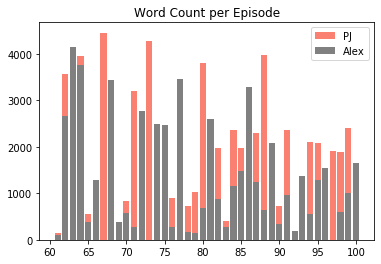

In [290]:
plt.bar(new_df.index[60:100], new_df['PJ_word_count'].iloc[60:100], color= 'salmon')
plt.bar(new_df.index[60:100], new_df['Alex_word_count'].iloc[60:100], color = 'gray')
plt.legend(['PJ', 'Alex'])
plt.title('Word Count per Episode')

Text(0.5, 1.0, 'Sentiment Score per Episode')

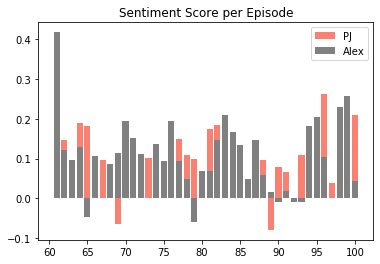

In [292]:
plt.bar(new_df.index[60:100] ,new_df['PJ_sent'].iloc[60:100], color= 'salmon')
plt.bar(new_df.index[60:100] ,new_df['Alex_sent'].iloc[60:100], color = 'gray')
plt.legend(['PJ', 'Alex'])
plt.title('Sentiment Score per Episode')

## PCA

In [176]:
from sklearn.decomposition import PCA

In [118]:
df_f_host

array([[1.61149342e+00, 0.00000000e+00, 5.97600606e-02, 0.00000000e+00,
        5.08753607e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.86427613e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.78396694e-01],
       ...,
       [5.94844899e-03, 0.00000000e+00, 0.00000000e+00, 5.26251888e-04,
        3.38606395e-03, 0.00000000e+00],
       [1.04374636e-01, 2.13153444e-03, 0.00000000e+00, 0.00000000e+00,
        6.03418198e-03, 1.80012384e-02],
       [4.63045761e-01, 5.82214374e-03, 6.63058894e-03, 3.49376261e-02,
        3.75460025e-02, 0.00000000e+00]])

In [202]:
pca = PCA(n_components=2)
pca.fit(df_f_host)
pcafeatures_ = pca.transform(df_f_host)

In [204]:
pca.explained_variance_ratio_

array([0.22024792, 0.18232486])

In [205]:
pca_df = pd.DataFrame(pcafeatures_, columns = ['PC1', 'PC2'])

In [206]:
pca_df['episode'] = host['episodeID']

In [207]:
pca_df.head()

,PC1,PC2,episode
0,-0.188333,-0.327361,/shows/reply-all/xjhx3l/146-summer-hotline
1,-0.191098,-0.277471,/shows/reply-all/rnhzlo/145-louder
2,-0.020699,0.030299,/shows/reply-all/6nhgol/144-dark-pattern
3,-0.259999,-0.329604,/shows/reply-all/76hdrj/143-permanent-record
4,-0.031474,0.005253,/shows/reply-all/gmhr36/142-we-didnt-start-the...


In [208]:
pca_df['host'] = 'PJ'

In [209]:
pca_df.head()

,PC1,PC2,episode,host
0,-0.188333,-0.327361,/shows/reply-all/xjhx3l/146-summer-hotline,PJ
1,-0.191098,-0.277471,/shows/reply-all/rnhzlo/145-louder,PJ
2,-0.020699,0.030299,/shows/reply-all/6nhgol/144-dark-pattern,PJ
3,-0.259999,-0.329604,/shows/reply-all/76hdrj/143-permanent-record,PJ
4,-0.031474,0.005253,/shows/reply-all/gmhr36/142-we-didnt-start-the...,PJ


In [237]:
pca_df.iloc[140:150]

,PC1,PC2,episode,host
140,-0.095708,-0.147442,/shows/reply-all/76h5zl/4-follow-the-money,PJ
141,-0.192135,-0.242002,/shows/reply-all/awhmex/3-we-know-what-you-did,PJ
142,-0.019327,-0.207789,/shows/reply-all/emhwz6/2-the-secret-gruesome-...,PJ
143,-0.190277,-0.403471,/shows/reply-all/wbhjrr/1-a-stranger-says-i-lo...,PJ
144,-0.114932,-0.237097,/shows/reply-all/xjhx3l/146-summer-hotline,Alex
145,0.006309,0.035017,/shows/reply-all/rnhzlo/145-louder,Alex
146,-0.163748,-0.346901,/shows/reply-all/6nhgol/144-dark-pattern,Alex
147,-0.083863,-0.082236,/shows/reply-all/76hdrj/143-permanent-record,Alex
148,-0.114110,-0.040072,/shows/reply-all/gmhr36/142-we-didnt-start-the...,Alex
149,-0.225663,-0.658757,/shows/reply-all/z3hgd2/141-adam-pisces-and-th...,Alex


In [214]:
pca_df['host'][144:] = 'Alex'

/Users/Chloe/.conda/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


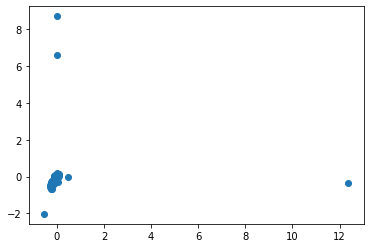

In [210]:
plt.scatter(pcafeatures_[:,0],pcafeatures_[:,1] )

In [216]:
pca_df.to_csv('/Users/Chloe/chi19_ds11/Project4/PCA_3.txt') #for visualization in Tableau

## WordClouds

In [97]:
from wordcloud import WordCloud, STOPWORDS

In [255]:
from sklearn.feature_extraction import text

In [256]:
more_stop_words_wc = ['like', 'just', 'yeah', 'people', 'know', 'said', 
                   'uh', 'really', 'don', 'going', 'think', 'did',
                  'got', 'right', 'thing', 'want', 'actually', 'um',
                  'ok', 'oh', 'hello', 'good', 'yes', 'think', 'sort',
                  've', 'kind', 'say', 'way', 'things', 'okay', 'didn',
                  'hi', 'gonna', 'alright', 'feel', 'll', 'say', 'bye',
                  'guys', 'stuff', 'guy', 'time', 'person', 'make', 'doing',
                  'does', 'lot','make', 'hey','getting', 'somebody', 'tell', 'day',
                  'happened', 'doesn', 'place', 'week', 'need', 'basically', 
                   'talking', 'told','let', 'wanted', 'says', 'look', 'called']

stop_words_wc = text.ENGLISH_STOP_WORDS.union(more_stop_words)

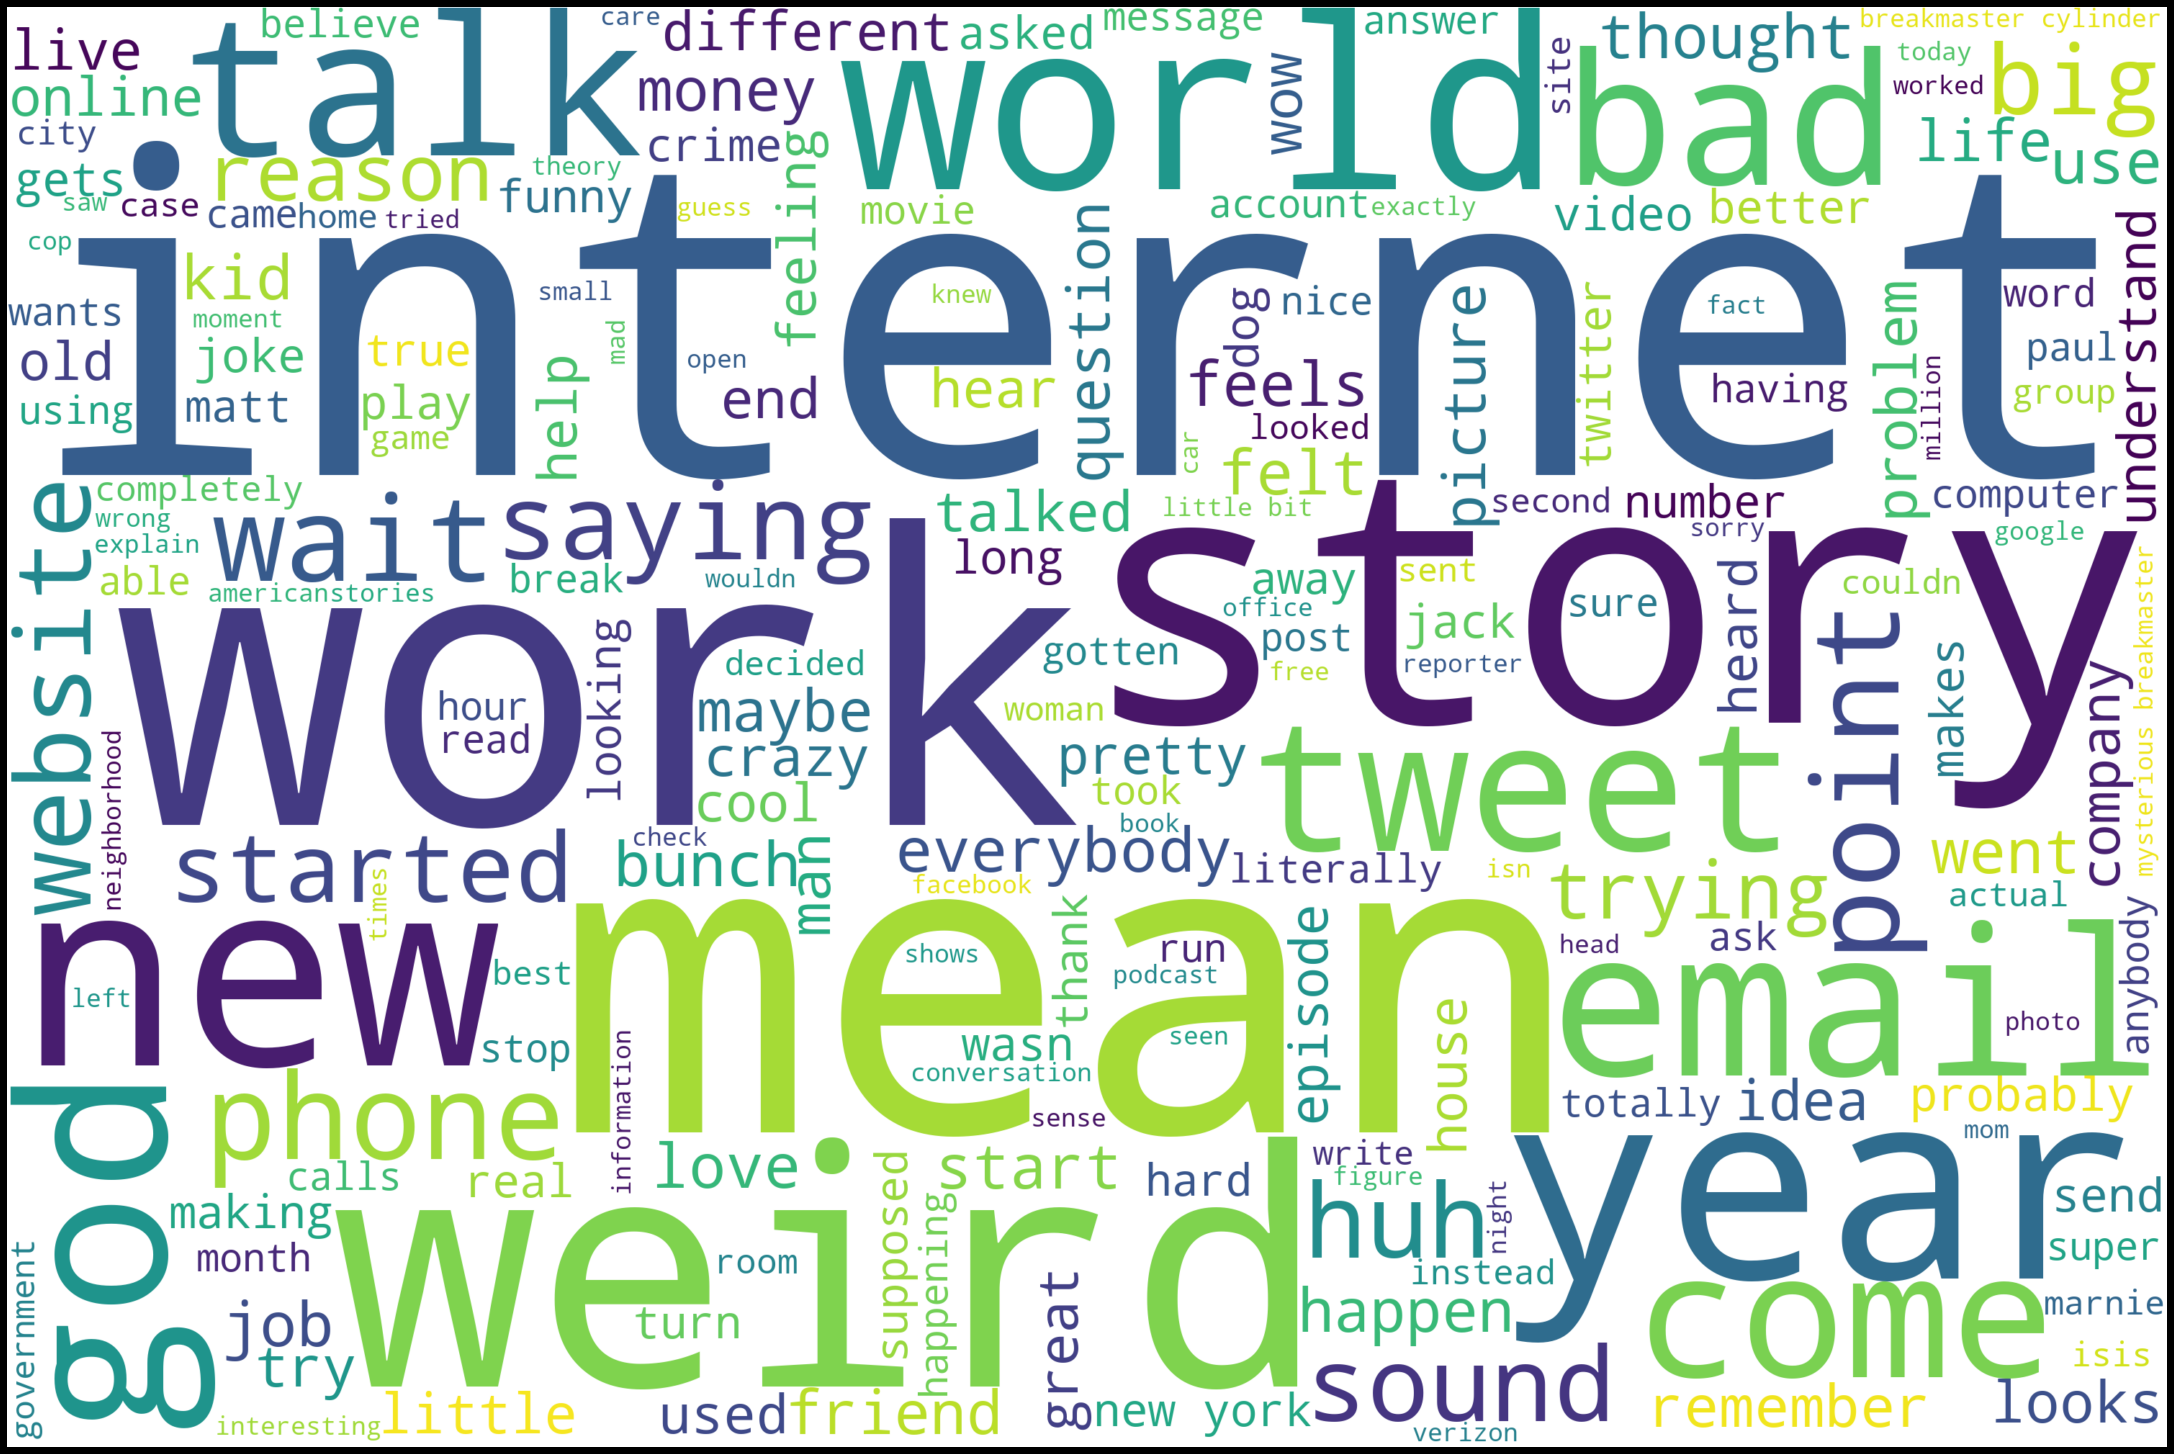

In [260]:
text = new_df.PJ.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = stop_words_wc).generate(str(text))

fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k')
    #edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

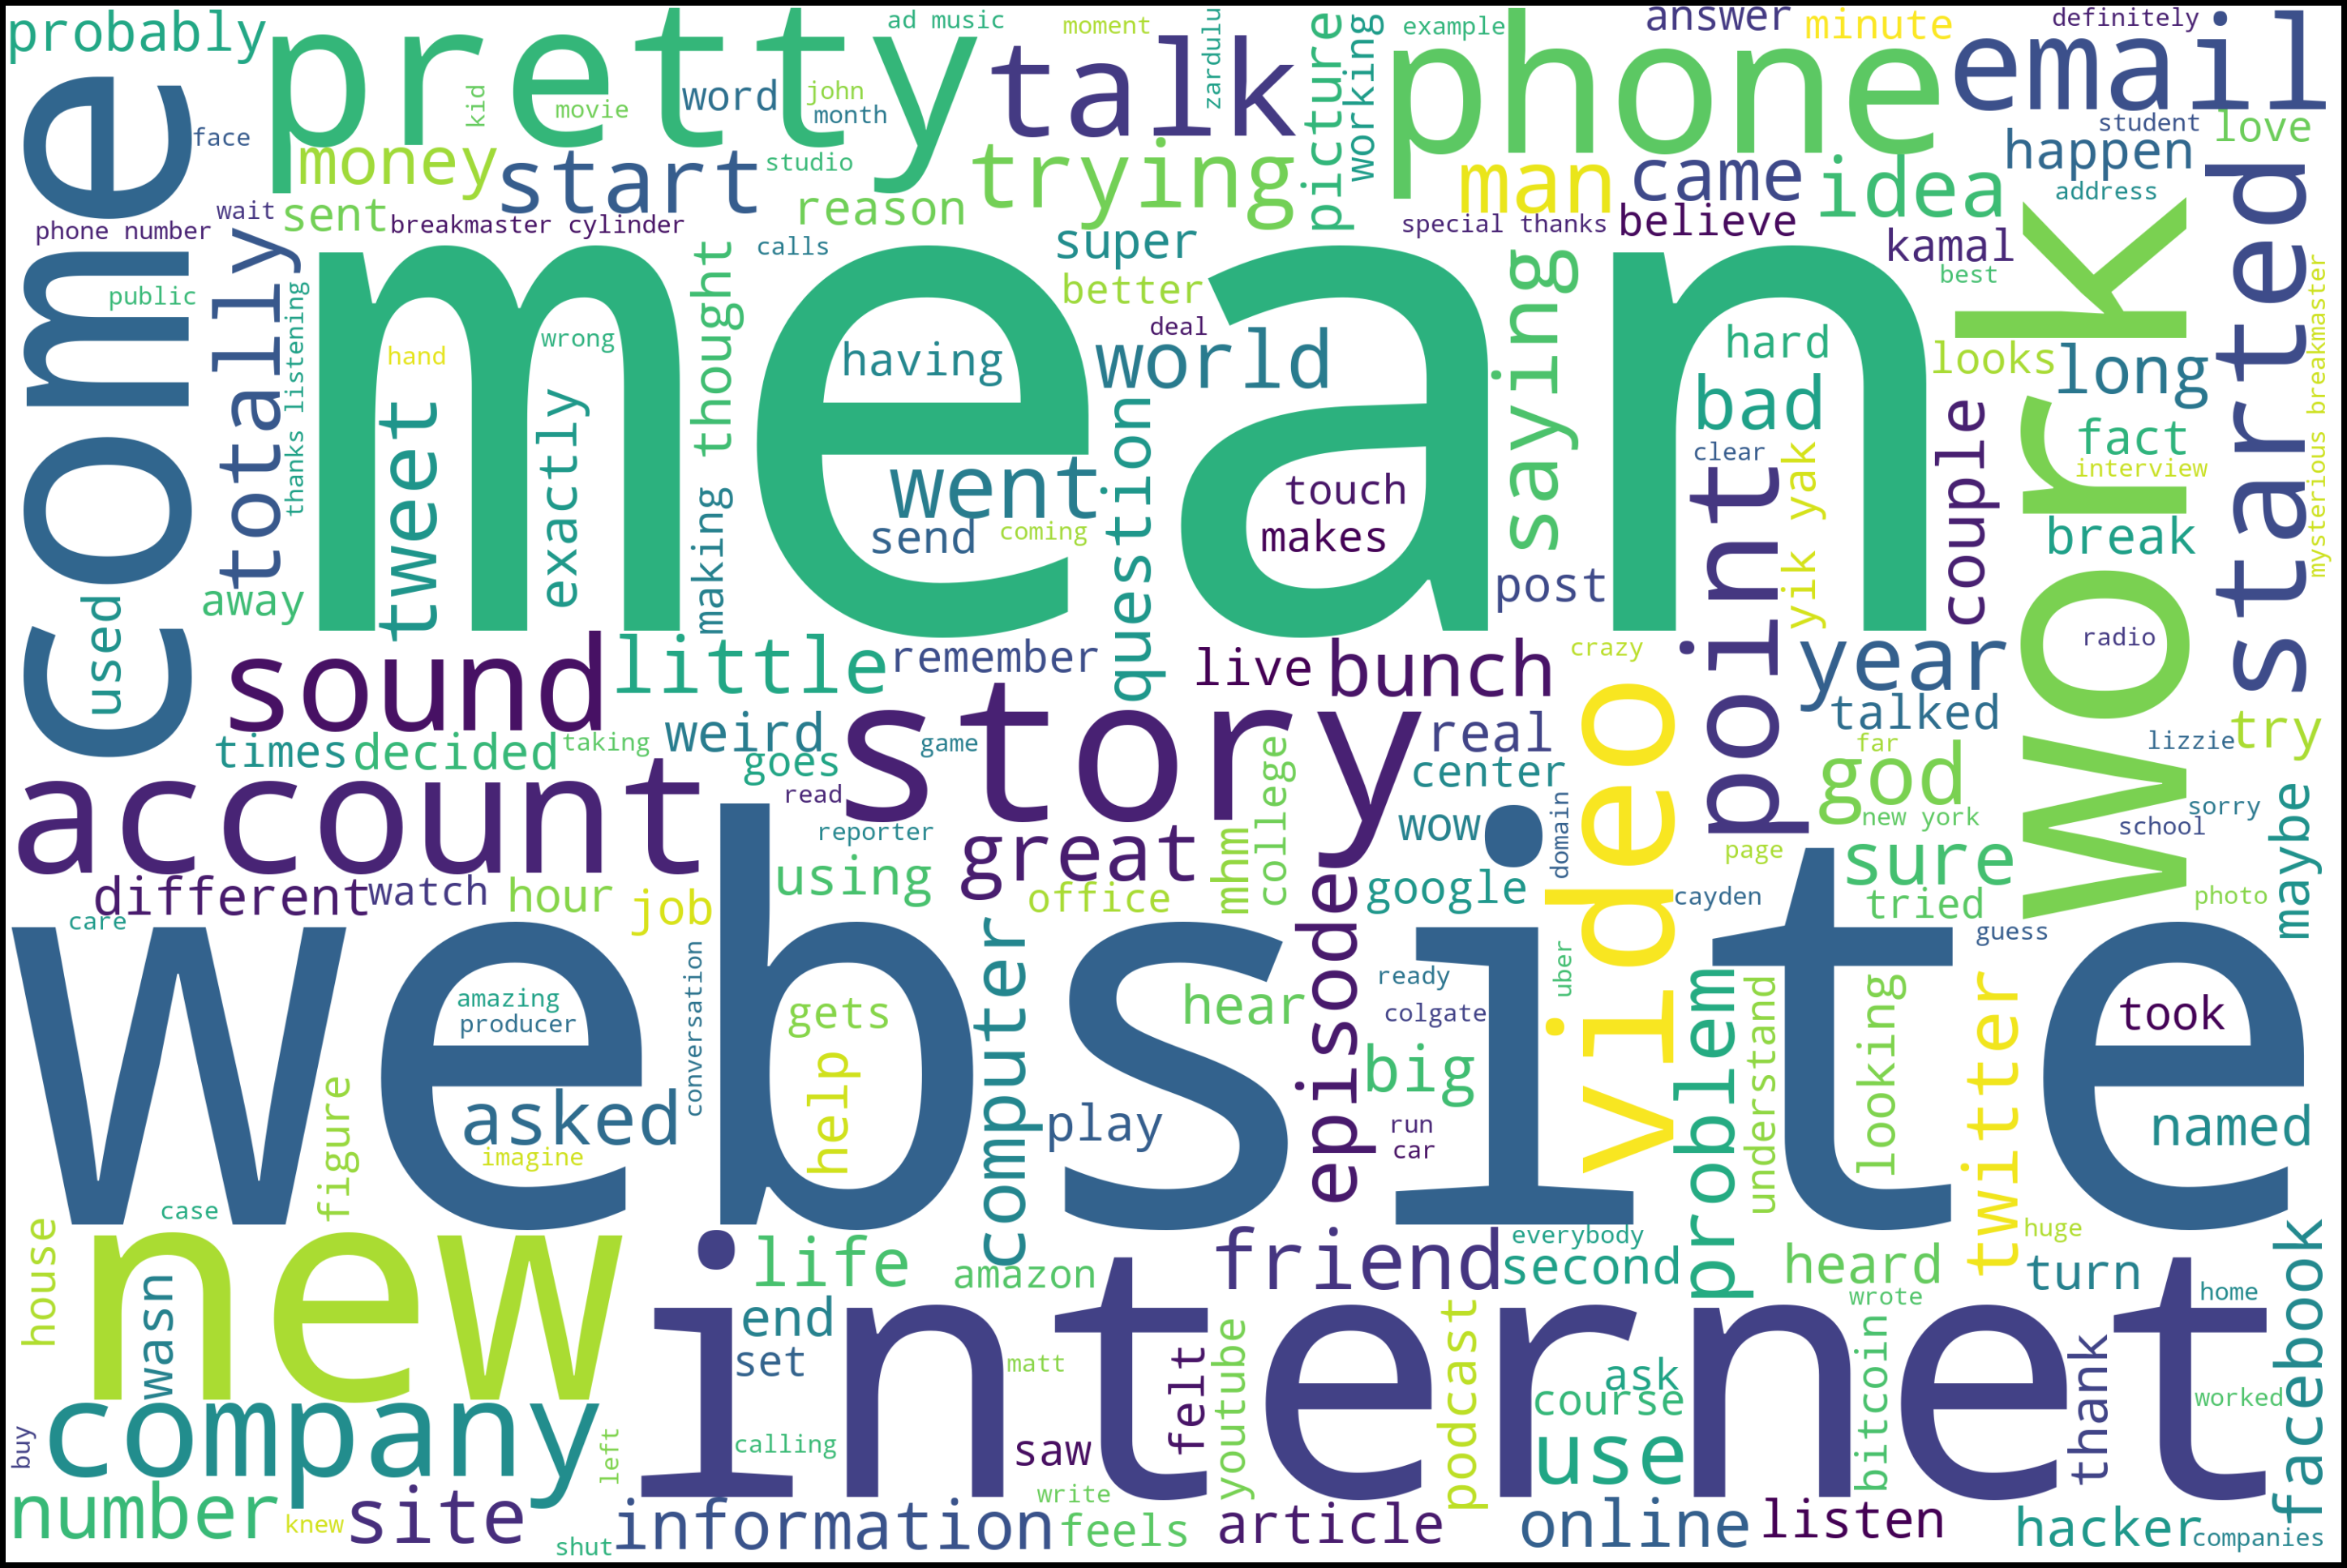

In [257]:
text = df.Alex.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = stop_words_wc).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()